In [0]:
import tensorflow as tf

In [3]:
 tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
!pip install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl  && pip install torchvision
  



  Using cached Pillow-5.1.0-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [5]:
 !pip install fastai

In [6]:
!apt update && apt install -y libsm6 libxext6

Hit:1 http://archive.ubuntu.com/ubuntu artful InRelease
Hit:2 http://security.ubuntu.com/ubuntu artful-security InRelease
Hit:3 http://archive.ubuntu.com/ubuntu artful-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu artful-backports InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
11 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsm6 is already the newest version (2:1.2.2-1).
libxext6 is already the newest version (2:1.3.3-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


## Image classification with Convolutional Neural Networks

Welcome to the first week of the second deep learning certificate! We're going to use convolutional neural networks (CNNs) to allow our computer to see - something that is only possible thanks to deep learning.

## Introduction to our first task: 'Dogs vs Cats'

*We*'re going to try to create a model to enter the Dogs vs Cats competition at Kaggle. There are 25,000 labelled dog and cat photos available for training, and 12,500 in the test set that we have to try to label for this competition. According to the Kaggle web-site, when this competition was launched (end of 2013): "State of the art: The current literature suggests machine classifiers can score above 80% accuracy on this task". So if we can beat 80%, then we will be at the cutting edge as of 2013!



In [0]:
#%reload_ext autoreload

#%autoreload 2

%matplotlib inline


## THE ABOVE 2 LINES HAVE BEEN COMMENTED OUT TO RESOLVE THE "PIL ERROR" ENCOUNTERED LATER *[for displayin the cat's image im.show()]*

In [0]:
#import every needed inport from fastai
from fastai.imports import *

In [0]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

PATH is the path to your data - if you use the recommended setup approaches from the lesson, you won't need to change this. sz is the size that the images will be resized to in order to ensure that the training runs quickly. We'll be talking about this parameter a lot during the course. Leave it at 224 for now.



In [0]:
PATH = "data/dogscats/"
sz=224

In [10]:
torch.cuda.is_available()

True

In [11]:
torch.backends.cudnn.enabled

True

In [0]:
!wget http://files.fast.ai/data/dogscats.zip && unzip dogscats.zip -d data/
!n

--2018-04-02 22:17:59--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip.5’

dogscats.zip.5        1%[                    ]  14.55M  18.1MB/s               ^C
/bin/sh: 1: n: not found


#Note: Earlier the above cmd broke off sayin' "INvalid Syntax"... then executed the install wget command[the one before the previous cmd] and then it finally worked

## *Note this Step.. slighlty differs from original NOtebook*

## First Look at the CAT Pictures

Our library will assume that you have train and valid directories. It also assumes that each dir will have subdirs for each class you wish to recognize (in this case, 'cats' and 'dogs').

In [12]:
!ls {PATH}

models	sample	test1  tmp  train  valid


In [13]:
os.listdir(f'{PATH}valid')

['cats', 'dogs']

In [14]:
files=os.listdir(f'{PATH}valid/cats')[:5]
files

['cat.1708.jpg',
 'cat.5631.jpg',
 'cat.5545.jpg',
 'cat.4160.jpg',
 'cat.6255.jpg']

In [15]:
!pip install Pillow==4.0.0
!pip install PIL
!pip install image
#import PIL.image

  Using cached Pillow-4.0.0-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: Pillow 5.1.0
    Uninstalling Pillow-5.1.0:
      Successfully uninstalled Pillow-5.1.0
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL


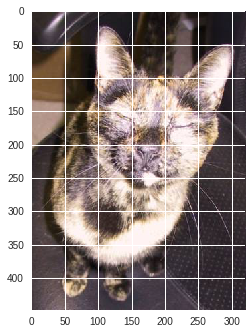

In [16]:
#img=plt.imread(f'{PATH}valid/cats/{files[0]}')
#plt.imshow(img);

img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img);

In [0]:
#img = plt.imread(f'{PATH}valid/cats/{files[0]}')
#plt.imshow(img);

In [18]:
img.shape

(448, 321, 3)

In [42]:
img[:4,:4]

array([[[45, 37, 35],
        [45, 37, 35],
        [45, 37, 35],
        [45, 37, 35]],

       [[46, 38, 36],
        [46, 38, 36],
        [46, 38, 36],
        [46, 38, 36]],

       [[48, 40, 38],
        [48, 40, 38],
        [48, 40, 38],
        [48, 40, 38]],

       [[49, 41, 39],
        [49, 41, 39],
        [49, 41, 39],
        [49, 41, 39]]], dtype=uint8)

In [0]:
sz=224

In [0]:
data=ImageClassifierData.from_paths(PATH,tfms=tfms_from_model(resnet34,sz),bs=32)

In [22]:
%time
learn=ConvLearner.pretrained(resnet34,data,precompute=True )

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 13.8 µs
100%|██████████| 63/63 [00:14<00:00,  4.32it/s]


In [31]:
learn.fit(0.01, 2)

[0.      0.03476 0.03213 0.98909]
[1.      0.04586 0.02756 0.99107]



How good is this model? Well, as we mentioned, prior to this competition, the state of the art was 80% accuracy. But the competition resulted in a huge jump to 98.9% accuracy, with the author of a popular deep learning library winning the competition. Extraordinarily, less than 4 years later, we can now beat that result in seconds! Even last year in this same course, our initial model had 98.3% accuracy, which is nearly double the error we're getting just a year later, and that took around 10 minutes to compute.



In [33]:
learn1=ConvLearner.pretrained(resnet34,data,precompute=True )
lrf=learn1.lr_find()

 75%|███████▍  | 536/719 [00:11<00:03, 47.82it/s, loss=0.371]

In [38]:
learn1.lr_find()



  3%|▎         | 20/719 [00:01<00:44, 15.61it/s, loss=0.911]


  6%|▌         | 43/719 [00:02<00:40, 16.82it/s, loss=0.882]


  9%|▉         | 63/719 [00:03<00:41, 15.79it/s, loss=0.853]


 10%|█         | 73/719 [00:04<00:40, 15.79it/s, loss=0.848]

 11%|█         | 77/719 [00:04<00:40, 16.00it/s, loss=0.841]

Exception in thread Thread-23:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.6/dist-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-24:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.6/dist-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



 74%|███████▎  | 530/719 [00:10<00:03, 48.33it/s, loss=0.364]


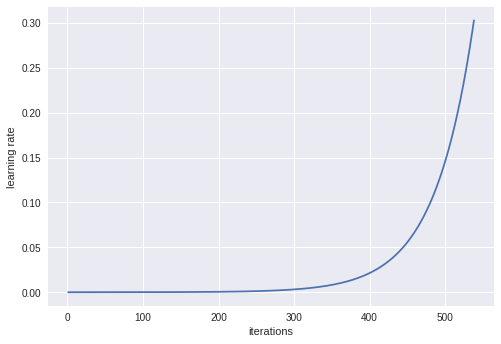

In [39]:
learn1.sched.plot_lr()

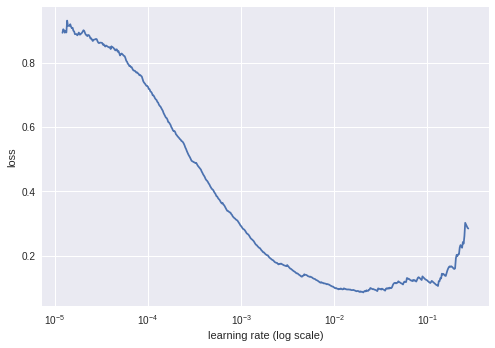

In [41]:
learn1.sched.plot()